ANN Classification of MNIST dataset

Necessary Imports

In [30]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Gathering Dataset

Loading the Data

In [31]:
#Gather the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Type of x_train: ", type(x_train))

x_train, x_test = x_train / 255.0, x_test / 255.0


print("shape of x_train: ", x_train.shape)
print("shape of x_test: ", x_test.shape)

print(y_train)

Type of x_train:  <class 'numpy.ndarray'>
shape of x_train:  (60000, 28, 28)
shape of x_test:  (10000, 28, 28)
[5 0 4 ... 5 6 8]


Instantiate or Build the Model


In [32]:
model = tf.keras.models.Sequential([
    #Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    # tf.keras.layers.Dense(128, activation = "relu"),
    # tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation = "softmax")
])

Checking Model Summary

In [33]:
opt = tf.keras.optimizers.SGD(learning_rate = 0.2)
model.compile(optimizer='SGD',
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy']) # Calculates how often predictions equal labels

In [34]:
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6379 - accuracy: 0.8407 - val_loss: 0.3564 - val_accuracy: 0.9025
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3399 - accuracy: 0.9043 - val_loss: 0.2943 - val_accuracy: 0.9168
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2925 - accuracy: 0.9161 - val_loss: 0.2665 - val_accuracy: 0.9259
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2623 - accuracy: 0.9252 - val_loss: 0.2408 - val_accuracy: 0.9322
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2386 - accuracy: 0.9323 - val_loss: 0.2201 - val_accuracy: 0.9376
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2190 - accuracy: 0.9386 - val_loss: 0.2059 - val_accuracy: 0.9409
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2030 - accuracy: 0.9427 - val_loss: 0.1917 - val_accuracy:

In [35]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 813us/step - loss: 0.1601 - accuracy: 0.9522
[0.16010111570358276, 0.9521999955177307]


(28, 28)
1/1 [==============================] - 0s 19ms/step
4


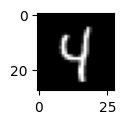

In [107]:
i = np.random.randint(low=1, high=len(x_test))
plt.figure(figsize=(1,1))
plt.imshow(x_test[i], cmap = 'gray', )
print(x_test[i].shape)
y_pred = model.predict(x_test[i].reshape(1, 28, 28))
print(y_pred.argmax())